# Network Science - 2

#### 1) Escreva um programa para gerar uma rede aleatória. Os parâmetros deste programa são: número de nós da rede e grau médio da rede.

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import binom
import warnings
warnings.filterwarnings('ignore')

def random_network(k,n):
    p = k/(n-1)
    g = np.zeros((1,2))
    l = 0
    for i in range(1,n+1):
        for j in range(i,n+1):
            u = np.random.uniform(0,1)
            if u<p:
                l += 1
                g = np.insert(g,l,[i,j],axis=0)
    g = np.delete(g,0,0)
    return g

In [8]:
g = random_network(10,100)
df = pd.DataFrame(g, columns=['A', 'B'])
df = df.astype(int)
g = nx.from_pandas_dataframe(df,'A','B')

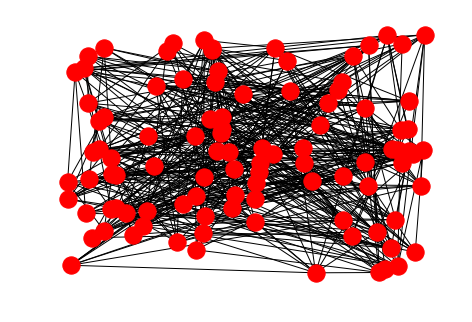

In [9]:
nx.draw_random(g)
plt.show()

#### 2) Seja $G$ um grafo aleatório com $N=7$ bilhões nós e grau médio $k_{m} \;\; = \; 1000$.

###### a) Calcule a proporção de nós que tem grau maior do que $1500$.

$\mathbb{P}(x) :=$ Função de Distribuição Acumulada até $x$

$p_{k} = {{N-1}\choose{k}} p^{k}(1-p)^{N-1-k}$

$N = 7.10^{9}$

$P(p_{k} $>$ 1500) = 1 - P(p_{k} \leq 1500) = 1 - \mathbb{P}(1500)$

Proporção $\approx 0,000000000000000011$

In [18]:
n = 10**9
x = 1500
k = 1000
p = k/(n-1)
b = binom.cdf(x,n,p)
b

0.99999999999999989

In [19]:
p1500 = 1 - b
print("A proporção de nós com grau maior do que 1500 é {}".format(p1500))

A proporção de nós com grau maior do que 1500 é 1.1102230246251565e-16


###### b) Calcule o grau esperado do nó mais conectado e do nó menos conectado.

$N[1-\mathbb{P}(k_{max})] \approx 1$

$1 - \mathbb{P}(k_{max}) = 1 - e^{-k_{m}} \sum_{k=0}^{k_{max}}\frac{k_{m}^{k}}{k!} = e^{k_m}\sum_{k=k_{max+1}}^{\infty}\frac{k_{m}^{k}}{k!}\approx e^{-k_{m}}\frac{k_{m}^{k_{max+1}}}{(k_{max+1})!}$

###### c) Você diria que os resultados de (a) e (b) são compatíveis com a rede de conhecidos dos humanos no globo?

Não, pois existem indivíduos com um $k$ extremamente grande (hubs) e indivíduos com um $k$ extremamente baixo, o que não ocorre no modelo de rede aleatória.

#### 3) Mostre que numa rede aleatória grande ($N$ suficientemente grande), se $k$<$1$ então o tamanho da maior componente conexa $N_g$ é muito menor do que $N$ e para $ k\;$>$ln⁡(N)$ o tamanho da maior componente conexa é próximo de $N$, isto é, $\frac{N_G}{N}→1$ (quando $N→∞$).

* Para calcularmos o valor de $k$, onde a maioris dos nós pertence a $N_{G}$, calculamos a probabilidade de um nó não estar conectado a $N_{G}$ como: 

    $(1-p)^{N_{G}} \approx (1-p)^N$

    Dado que $N_{G} \approx  N$ e que $I_{N} :=$ Valor esperado de nós não conectados a $N_{G}$ 

    $I_{N} =N(1−p)^{N} = N(1− \frac{Np}{N})^{N} \approx Ne^{−Np}$

    Tomando $p$ arbitrariamente grande, teremos eventualmente $I_{N} = 1 \Longrightarrow Ne^{-Np} = 1$ 

    Assim $p = \frac{ln(N)}{N}$ leva ao surgimento da "giant connected component".



* Para determinarmos o valor de $k$, onde $N_{G}$ passa a crescer temos que:

    Tomando $S := \frac{N_{G}}{N}$ e tomando $S$ em função de $k$ como $S=1−e^{−kS}$
    
    Resolvendo numéricamente temos k = 1:

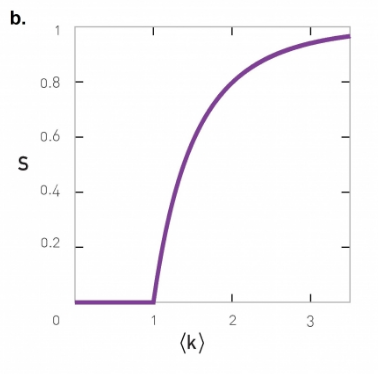

In [2]:
Image(filename = "/home/nbuser/k=1.png")

#### 4) Estime o diâmetro das redes em função do tamanho N abaixo:

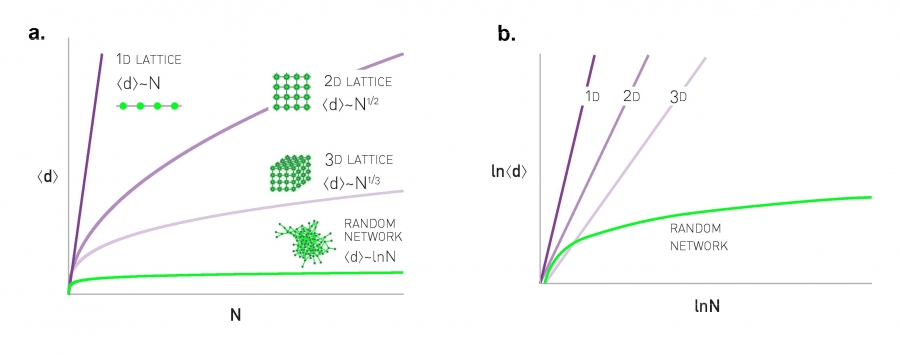

In [2]:
Image(filename = "/home/nbuser/3.11.jpg")

###### a) nós alinhados

$d_{1D} = N$

###### b) grade regular 2D

$d_{2D} = N^{\frac{1}{2}}$

###### c) grade regular 3D

$d_{3D}= N^{\frac{1}{3}}$ 

###### d) rede aleatória

$d_{random} \approx ln(N)$